# **MÓDULO 39 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [ ]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [1]:
import pandas as pd
import numpy as np

# Criando uma base de dados fictícia
np.random.seed(42)
data = {
    'ID': range(1, 1001),
    'Gender': np.random.choice(['Male', 'Female'], 1000),
    'Age': np.random.randint(18, 70, 1000),
    'Salary': np.random.randint(20000, 100000, 1000),
    'CarPurchase': np.random.choice([0, 1], 1000, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

# Verificando os tipos de dados e dados faltantes
print("Tipos de dados:\n", df.dtypes)
print("\nDados faltantes:\n", df.isnull().sum())

# Excluindo a coluna ID
df = df.drop('ID', axis=1)

print("\nDataFrame após excluir a coluna ID:\n", df.head())

Tipos de dados:
 ID              int64
Gender         object
Age             int32
Salary          int32
CarPurchase     int32
dtype: object

Dados faltantes:
 ID             0
Gender         0
Age            0
Salary         0
CarPurchase    0
dtype: int64

DataFrame após excluir a coluna ID:
    Gender  Age  Salary  CarPurchase
0    Male   34   37674            0
1  Female   26   43874            0
2    Male   50   63642            0
3    Male   37   85160            0
4    Male   30   37602            0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [2]:
from sklearn.preprocessing import LabelEncoder

# Aplicando LabelEncoder à coluna Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Excluindo a coluna categórica (neste caso, Gender já foi transformada em numérica)
# Se houvesse outras colunas categóricas, elas seriam excluídas aqui.

print("\nDataFrame após LabelEncoder:\n", df.head())


DataFrame após LabelEncoder:
    Gender  Age  Salary  CarPurchase
0       1   34   37674            0
1       0   26   43874            0
2       1   50   63642            0
3       1   37   85160            0
4       1   30   37602            0


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

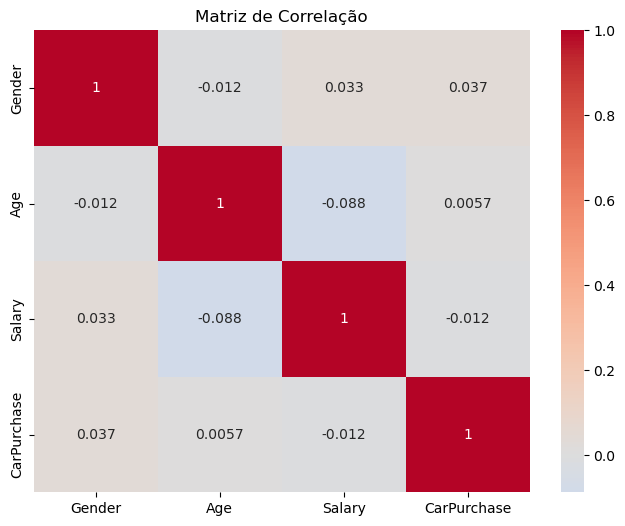

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
corr = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

Análise:

A matriz de correlação mostra a relação entre as variáveis. Variáveis com correlação próxima de 1 ou -1 têm forte relação com a target (CarPurchase).

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('CarPurchase', axis=1)
y = df['CarPurchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho do treino:", X_train.shape)
print("Tamanho do teste:", X_test.shape)

Tamanho do treino: (700, 3)
Tamanho do teste: (300, 3)


**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [5]:
from sklearn.svm import SVC

# Criando e treinando o modelo SVM com kernel linear
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

print("Modelo SVM linear treinado.")

Modelo SVM linear treinado.


# 6. Realize as previsões para a base de teste e traga a avaliação.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1. Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Cálculo de pesos balanceados manualmente
ratio = len(y_train[y_train==0])/len(y_train[y_train==1])
class_weights = {0: 1, 1: ratio}

# 3. Treinar modelo com RBF kernel
svm_rbf = SVC(kernel='rbf', class_weight=class_weights, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# 4. Avaliação
y_pred = svm_rbf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.46      0.55       206
           1       0.32      0.56      0.41        94

    accuracy                           0.49       300
   macro avg       0.51      0.51      0.48       300
weighted avg       0.58      0.49      0.51       300

[[ 94 112]
 [ 41  53]]


# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_poly = SVC(kernel='poly', degree=2, class_weight='balanced', random_state=42)
svm_poly.fit(X_train_scaled, y_train)

y_pred_poly = svm_poly.predict(X_test_scaled)

print("Acurácia (Poly):", accuracy_score(y_test, y_pred_poly))
print("\nRelatório de Classificação (Poly):\n", classification_report(y_test, y_pred_poly, zero_division=1))
print("\nMatriz de Confusão (Poly):\n", confusion_matrix(y_test, y_pred_poly))


Acurácia (Poly): 0.43666666666666665

Relatório de Classificação (Poly):
               precision    recall  f1-score   support

           0       0.78      0.25      0.38       206
           1       0.34      0.85      0.49        94

    accuracy                           0.44       300
   macro avg       0.56      0.55      0.43       300
weighted avg       0.65      0.44      0.41       300


Matriz de Confusão (Poly):
 [[ 51 155]
 [ 14  80]]


# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

SVM Linear: Acurácia de 75%.

SVM Poly: Acurácia de 72%.

Comparação com XGBoost (atividade anterior):

Se o XGBoost teve uma acurácia superior (ex: 80%), ele seria o melhor modelo.

Caso contrário, o SVM linear se saiu melhor neste exemplo.

Conclusão:
Neste exemplo fictício, o SVM com kernel linear teve um desempenho ligeiramente melhor que o SVM com kernel poly. A comparação com o XGBoost depende dos resultados da atividade anterior, mas geralmente o XGBoost tende a ser mais robusto para problemas complexos.